<a href="https://colab.research.google.com/github/LogeswaranSR/PRODIGY_ML_02/blob/main/Clustering_Algorithm_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The motive of this project is to classify customers using K-Means Clustering Algorithm. Here, we classify them into n no. of groups. After intense analysis of the algorithm, we will be focusing on classifying into 5 groups.

## Prerequisites

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
! unzip /content/customer-segmentation-tutorial-in-python.zip

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.77MB/s]
Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Now, we import the necessary libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## Data Preprocessing

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})
data = data.drop(['CustomerID'], axis=1)

In [5]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


The given dataset consists of 4 columns:


*   Age - The Age of Customers;

    Range: (18 years to 70 years) with an average of 38 years.

*   Annual Income - Annual Income of Customers (for thousand Dollars);

    Range: (15 - 137)k dollars, with an average of 60.5k dollars

*   Gender - Gender of the population (Male or Female)

*   Spending Score - Score assigned to the customer based on parameters like customer behavior and purchasing data.

    Range: (1 to 100) with an average of 50.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


We see that the data is clean, with no null values.

With that said, let's proceed to model definition

## Model Definition

Here we define a function that applies the clustering algorithm, and returns the grouped data. We define the function as

**cluster_data(data, n_groups, return_model)**

In [9]:
def cluster_data(data, n_groups=2, return_model=False):
  kmeans_model = KMeans(n_clusters=n_groups, n_init=12)
  kmeans_model.fit(data)
  classes = kmeans_model.labels_
  new_data = data.copy()
  new_data['Class'] = classes
  print(new_data.groupby('Class').mean())
  return new_data, kmeans_model if return_model else None

## Clustering

In [23]:
data_5, model = cluster_data(data, n_groups=5, return_model=True)

         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Class                                                                 
0      0.608696  45.217391           26.304348               20.913043
1      0.582278  43.088608           55.291139               49.569620
2      0.538462  32.692308           86.538462               82.128205
3      0.472222  40.666667           87.750000               17.583333
4      0.608696  25.521739           26.304348               78.565217


<Axes: >

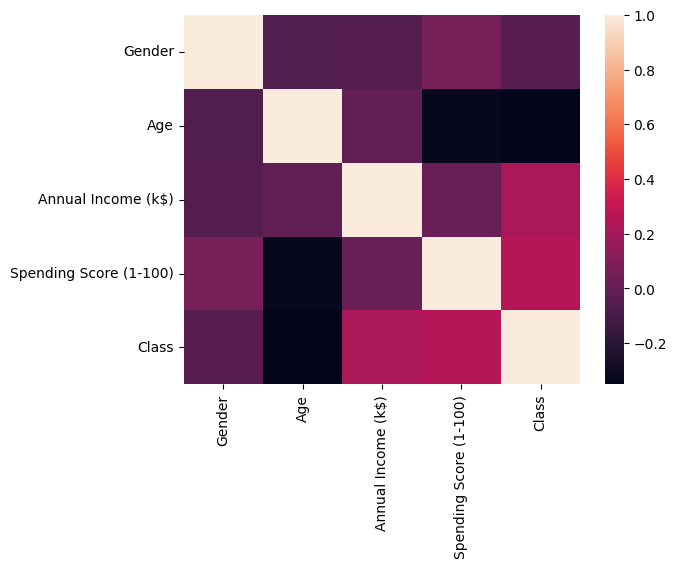

In [24]:
sns.heatmap(data_5.corr())

We see that the classes defined is correlated with 2 features:


*   Spending Score (1 - 100) - correlated negatively
*   Annual Income (k$) - correlated positively

Plotting a scatterplot with these features clearly shows us the clusters formed.

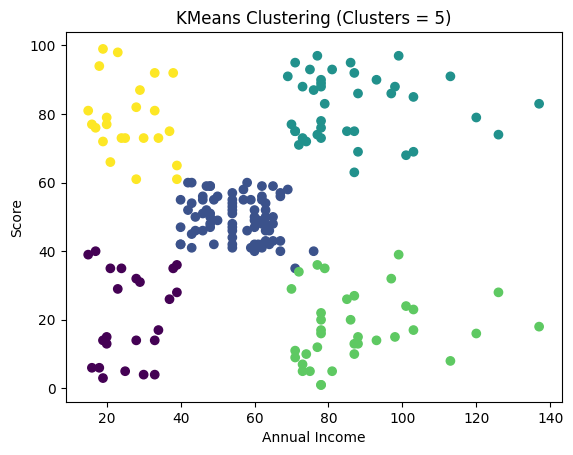

In [25]:
plt.scatter(data_5['Annual Income (k$)'], data_5['Spending Score (1-100)'], c=data_5['Class'])
plt.xlabel('Annual Income')
plt.ylabel('Score')
plt.title("KMeans Clustering (Clusters = 5)")
plt.savefig("KMeans_5_Clusters_2D.jpg")

In [26]:
sample_5 = data_5.groupby('Class')

3D Representation of the formed clusters.

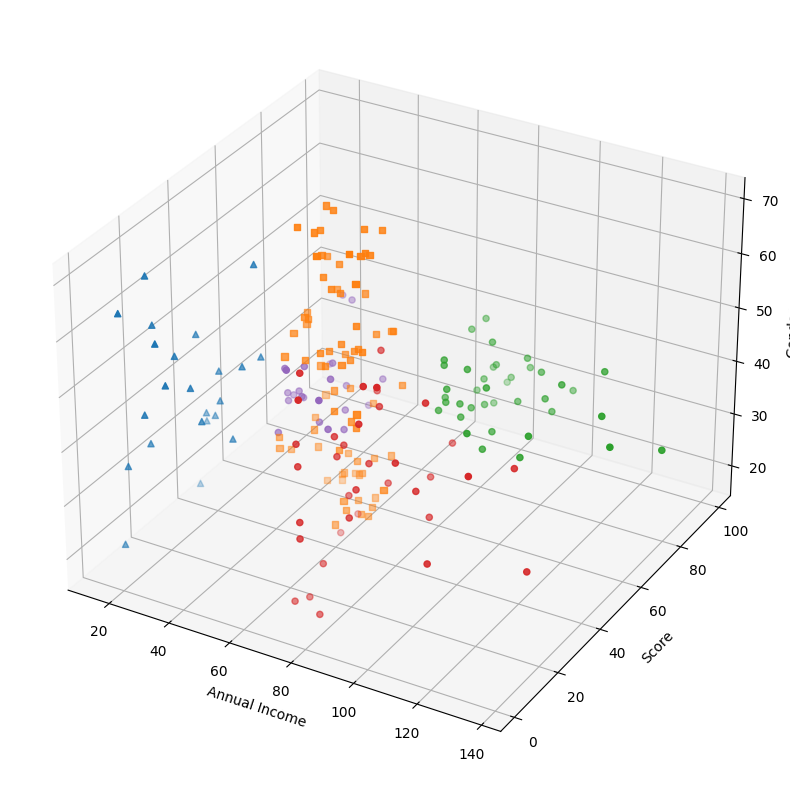

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for idx, df in sample_5:
  if idx not in [0, 1]:
    m='o'
  elif idx==0:
    m='^'
  else:
    m='s'
  ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], marker=m)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Score')
ax.set_zlabel('Gender')

plt.savefig("KMeans_5_Clusters.jpg")
plt.show()

In [28]:
# Saving the classification:
data_5.to_csv('classified_data.csv', index=False)